Importing dependencies

In [1]:
import tradingeconomics as te
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

API login

In [2]:
te.login('jupyter:jupyter') # Signup for a free API key at https://developer.tradingeconomics.com/

'You are logged in as a jupyter:jupyter'

Importing data

In [3]:
raw_df = te.getHistorical(symbol=['XB1:COM', 'OXY:US', 'NG1:COM', 'CL1:COM'], initDate='2020-01-01')

gasoline = raw_df.loc[raw_df['Symbol'] == 'XB1:COM']
petroleum = raw_df.loc[raw_df['Symbol'] == 'OXY:US']
natural_gas = raw_df.loc[raw_df['Symbol'] == 'NG1:COM']
crude_oil = raw_df.loc[raw_df['Symbol'] == 'CL1:COM']

Data manipulation

In [4]:
gasoline = gasoline[['Date', 'Close']].rename(columns={'Close': 'Gasoline'}, inplace=False)
petroleum = petroleum[['Date', 'Close']].rename(columns={'Close': 'Petroleum'}, inplace=False)
natural_gas = natural_gas[['Date', 'Close']].rename(columns={'Close': 'NaturalGas'}, inplace=False)
crude_oil = crude_oil[['Date', 'Close']].rename(columns={'Close': 'CrudeOil'}, inplace=False)

df = pd.merge(gasoline, petroleum, on='Date')
df = pd.merge(df, natural_gas, on='Date')

df['Date'] = pd.to_datetime(df['Date'], format="%d/%m/%Y")

df.sort_values(['Date'], inplace=True)
df.set_index('Date', inplace=True)

df

,Gasoline,Petroleum,NaturalGas
Date,,,
2020-01-02,1.7155,42.58,2.1020
2020-01-03,1.7628,43.61,2.1012
2020-01-06,1.7591,45.05,2.1532
2020-01-07,1.7858,45.27,2.1376
2020-01-08,1.6676,44.98,2.1427
...,...,...,...
2021-06-18,2.1683,27.99,3.2150
2021-06-21,2.1969,29.50,3.1910
2021-06-22,2.2243,30.01,3.2580


Plotting

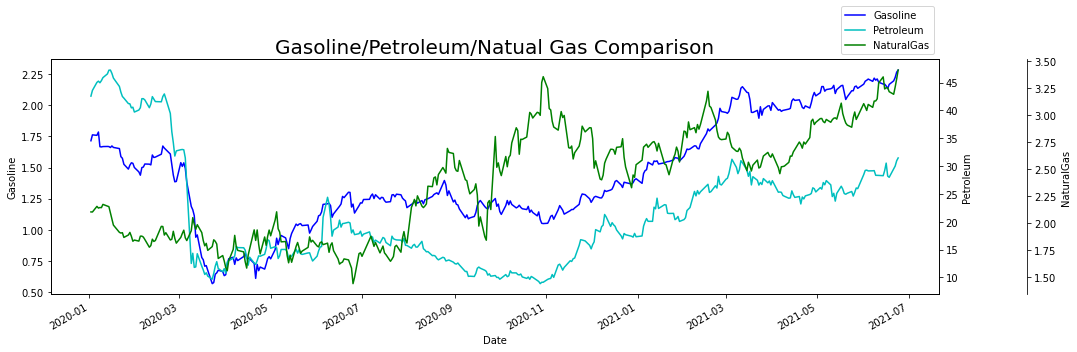

In [8]:
from helper import plot_multi
ax = plot_multi(df, figsize=(15, 5))
ax.set_title('Gasoline/Petroleum/Natual Gas Comparison', color='black', size=20)
plt.tight_layout()